<a href="https://colab.research.google.com/github/st3vejobs/DATA-604/blob/homework/Homework_4/DATA_604_HW4_Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling and Simulation in Python

Chapter 8

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [164]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'


### The pint and modsim modules must be downloaded using the below commands.
try:
    import pint
except ImportError:
    !pip install pint
    import pint
    
try:
    from modsim import *
except ImportError:
    !pip install modsimpy
    from modsim import *

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
#%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module

from matplotlib.pyplot import plot

ERROR:root:The 'ast_node_interactivity' trait of a Shell instance expected any of ['all', 'last', 'last_expr', 'none'], not the str 'last_expr_or_assign'.


### Functions from the previous chapter

In [165]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [166]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

### Reading the data

In [167]:
def read_table2(filename = 'data/World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table2 = tables[2]
    table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
    return table2

In [168]:
#table2 = read_table2()
#table2.to_csv('data/World_population_estimates2.csv')

In [169]:
table2 = pd.read_csv('https://raw.githubusercontent.com/AllenDowney/ModSimPy/master/data/World_population_estimates2.csv')
table2.index = table2.Year
table2.head()

,Year,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,,
1950,1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


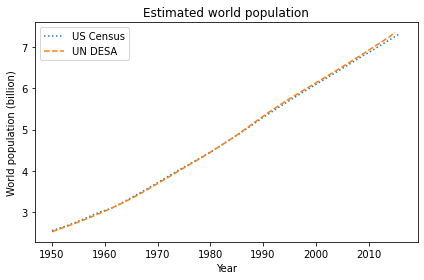

In [170]:
un = table2.un / 1e9
census = table2.census / 1e9
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')

### Running the quadratic model

Here's the update function for the quadratic growth model with parameters `alpha` and `beta`.

In [171]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

Extract the starting time and population.

In [172]:
def get_first_label(x):
    """Returns the label of the first element.
    :param x: Series or DataFrame
    """
    return x.index[0]

def get_last_label(x):
    """Returns the label of the last element.
    :param x: Series or DataFrame
    """
    return x.index[-1]
    
def get_first_value(x):
    """Returns the value of the first element.
    Does not work with DataFrames; use first_row().
    :param x: Series
    """
    return x[x.index[0]]


t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)

Initialize the system object.

In [173]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

Run the model and plot results.

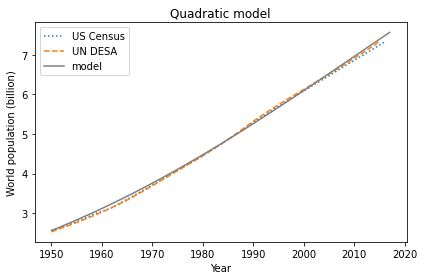

In [174]:
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')

### Generating projections

To generate projections, all we have to do is change `t_end`

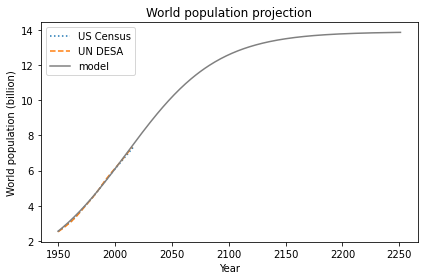

In [175]:
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'World population projection')
#savefig('figs/chap08-fig01.pdf')

The population in the model converges on the equilibrium population, `-alpha/beta`

In [176]:
results[system.t_end]

13.856665141368708

In [177]:
-system.alpha / system.beta

13.88888888888889

**Exercise:**  What happens if we start with an initial population above the carrying capacity, like 20 billion?  Run the model with initial populations between 1 and 20 billion, and plot the results on the same axes.

0.025 13.88888888888889
Time
1950    20.000000
1951    19.780000
1952    19.570253
1953    19.370119
1954    19.179009
          ...    
2013    14.799345
2014    14.775092
2015    14.751523
2016    14.728618
2017    14.706355
Name: Quantity, Length: 68, dtype: float64
Time
1950    1.000000
1951    1.023200
1952    1.046896
1953    1.071095
1954    1.095807
          ...   
2013    3.749331
2014    3.817761
2015    3.886970
2016    3.956948
2017    4.027689
Name: Quantity, Length: 68, dtype: float64


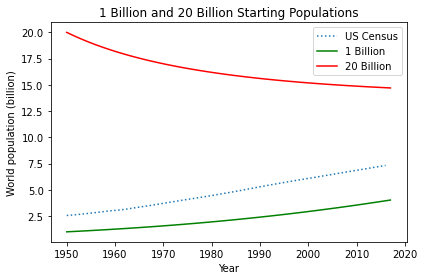

In [178]:
def cc_update(pop,t,system):
  net_growth = (system.alpha) * pop * (1 - pop / (-system.alpha/system.beta))
  return pop + net_growth

system.r = system.alpha
system.K = -system.alpha/system.beta

print(system.r, system.K)

def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

system_20 = System(t_0=t_0, 
                t_end=t_end,
                p_0=20,
                alpha = 0.025,
                beta = -.0018)

uh_oh = run_simulation(system_20,cc_update)
print(uh_oh)

system_1 = System(t_0=t_0, 
                t_end=t_end,
                p_0=1,
                alpha = 0.025,
                beta = -.0018)

anew = run_simulation(system_1,cc_update)
print(anew)

def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, color = 'green', label='1 Billion')
    plot(timeseries, color='red', label='20 Billion')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

plot_results(census, anew, uh_oh, '1 Billion and 20 Billion Starting Populations')

### Comparing projections

We can compare the projection from our model with projections produced by people who know what they are doing.

In [179]:
def read_table3(filename = 'data/World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table3 = tables[3]
    table3.columns = ['census', 'prb', 'un']
    return table3

In [180]:
#table3 = read_table3()
#table3.to_csv('data/World_population_estimates3.csv')

In [181]:
table3 = pd.read_csv('https://raw.githubusercontent.com/AllenDowney/ModSimPy/master/data/World_population_estimates3.csv')
table3.index = table3.Year
table3.head()

,Year,census,prb,un
Year,,,,
2016,2016,7.334772e+09,NaN,7.432663e+09
2017,2017,7.412779e+09,NaN,NaN
2018,2018,7.490428e+09,NaN,NaN
2019,2019,7.567403e+09,NaN,NaN
2020,2020,7.643402e+09,NaN,7.758157e+09


`NaN` is a special value that represents missing data, in this case because some agencies did not publish projections for some years.

This function plots projections from the UN DESA and U.S. Census.  It uses `dropna` to remove the `NaN` values from each series before plotting it.

In [182]:
def plot_projections(table):
    """Plot world population projections.
    
    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    
    plot(census_proj.dropna(), ':', color='C0', label='US Census')
    plot(un_proj.dropna(), '--', color='C1', label='UN DESA')

Run the model until 2100, which is as far as the other projections go.

In [183]:
system = System(t_0=t_0, 
                t_end=2100,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

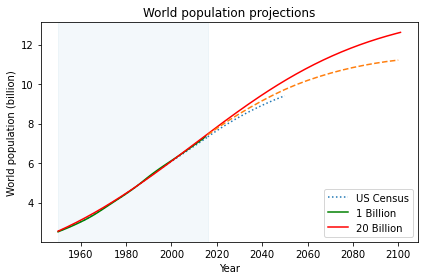

In [184]:
results = run_simulation(system, update_func_quad)

plt.axvspan(1950, 2016, color='C0', alpha=0.05)
plot_results(census, un, results, 'World population projections')
plot_projections(table3)
#savefig('figs/chap08-fig02.pdf')

People who know what they are doing expect the growth rate to decline more sharply than our model projects.

## Exercises

**Exercise:** The net growth rate of world population has been declining for several decades.  That observation suggests one more way to generate projections, by extrapolating observed changes in growth rate.

The `modsim` library provides a function, `compute_rel_diff`, that computes relative differences of the elements in a sequence.

Here's how we can use it to compute the relative differences in the `census` and `un` estimates:

In [185]:
import pandas
import numpy
def compute_rel_diff(seq):
    """Compute absolute differences between successive elements.
    :param seq: any sequence
    :return: Series is seq is a Series, otherwise NumPy array
    """
    diff = compute_abs_diff(seq)
    return diff / seq

def compute_abs_diff(seq):
    """Compute absolute differences between successive elements.
    :param seq:
    :return: Series is seq is a Series, otherwise NumPy array
    """
    xs = np.asarray(seq)

    # The right thing to put at the end is np.nan, but at
    # the moment edfiff1d is broken
    # https://github.com/numpy/numpy/issues/13103
    # So I'm working around by appending 0 instead.
    # to_end = np.array([np.nan], dtype=np.float64)
    to_end = np.array([0], dtype=np.float64)
    diff = np.ediff1d(xs, to_end)

    if isinstance(seq, pandas.Series):
        return pandas.Series(diff, seq.index)
    else:
        return diff    

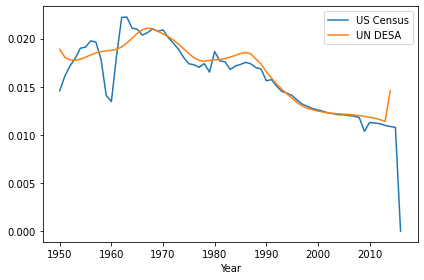

In [186]:
alpha_census = compute_rel_diff(census)
plot(alpha_census, label='US Census')

alpha_un = compute_rel_diff(un)
plot(alpha_un, label='UN DESA')

decorate(xlabel='Year', label='Net growth rate')

Other than a bump around 1990, net growth rate has been declining roughly linearly since 1965.  As an exercise, you can use this data to make a projection of world population until 2100.

1. Define a function, `alpha_func`, that takes `t` as a parameter and returns an estimate of the net growth rate at time `t`, based on a linear function `alpha = intercept + slope * t`.  Choose values of `slope` and `intercept` to fit the observed net growth rates since 1965.

2. Call your function with a range of `ts` from 1960 to 2020 and plot the results.

3. Create a `System` object that includes `alpha_func` as a system variable.

4. Define an update function that uses `alpha_func` to compute the net growth rate at the given time `t`.

5. Test your update function with `t_0 = 1960` and `p_0 = census[t_0]`.

6. Run a simulation from 1960 to 2100 with your update function, and plot the results.

7. Compare your projections with those from the US Census and UN.

In [187]:
def alpha_func(t):
  intercept = 0.02
  slope = -.0002
  t0 = 1970
  return intercept + slope *(t - t0)

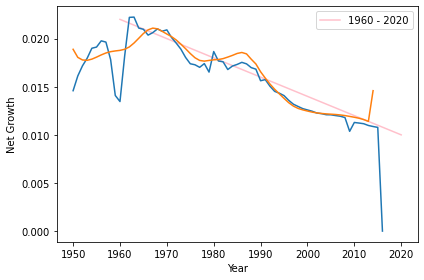

In [188]:
ts = numpy.arange(1960,2021)
model = TimeSeries(alpha_func(ts),ts)

plot(model, color='pink', label='1960 - 2020')
plot(alpha_census)
plot(alpha_un)

decorate(xlabel='Year', ylabel='Net Growth')

In [189]:
t_0 = 1960
p_0 = census[t_0]
t_end = 2100

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha_func=alpha_func)

In [190]:
def update_func_alpha_func(pop,t,system):
  net_growth = system.alpha_func(t) * pop
  return pop + net_growth
update_func_alpha_func(p_0,t_0,system)

3.109947541176

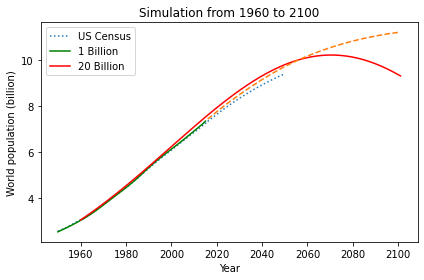

In [191]:
sim = run_simulation(system,update_func_alpha_func)
plot_results(census,un,sim,"Simulation from 1960 to 2100")
plot_projections(table3)
